In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv("insurance.csv")


In [ ]:
#data explore & cleaning

### check for duplicate values

In [ ]:
duplicates = data[data.duplicated()]
if not duplicates.empty:
    print("Duplicate Rows :")
    print(duplicates)
else:
    print("No duplicates found")

Duplicate Rows :
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [ ]:
data.duplicated().sum()

1

In [ ]:
# Remove duplicate rows
data = data.drop_duplicates()


In [ ]:
data.duplicated().sum()

0

### Handling Outliers:

In [ ]:


#outliers
# Calculate the Z-scores for the columns of my data to find outliers
cols=["charges","age","bmi","children"]
for i in cols:
     z_scores = stats.zscore(data[i])
     threshold = 5
     #Create a mask for outliers
     outlier_mask = abs(z_scores) > threshold
     outlier_indices =data.loc[outlier_mask,[i]]
# Count the number of outliers detected
     num_outliers = outlier_mask.sum()
     print("Number of outliers detected:", num_outliers)



Number of outliers detected: 0
Number of outliers detected: 0
Number of outliers detected: 0
Number of outliers detected: 0


#### no outliers found

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### Exploratory Data Analysis (EDA):
* Conduct exploratory data analysis to understand the distribution of variables, relationships between features, and potential patterns in the data. Visualization tools such as histograms, scatter plots, and correlation matrices can be helpful.

In [ ]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


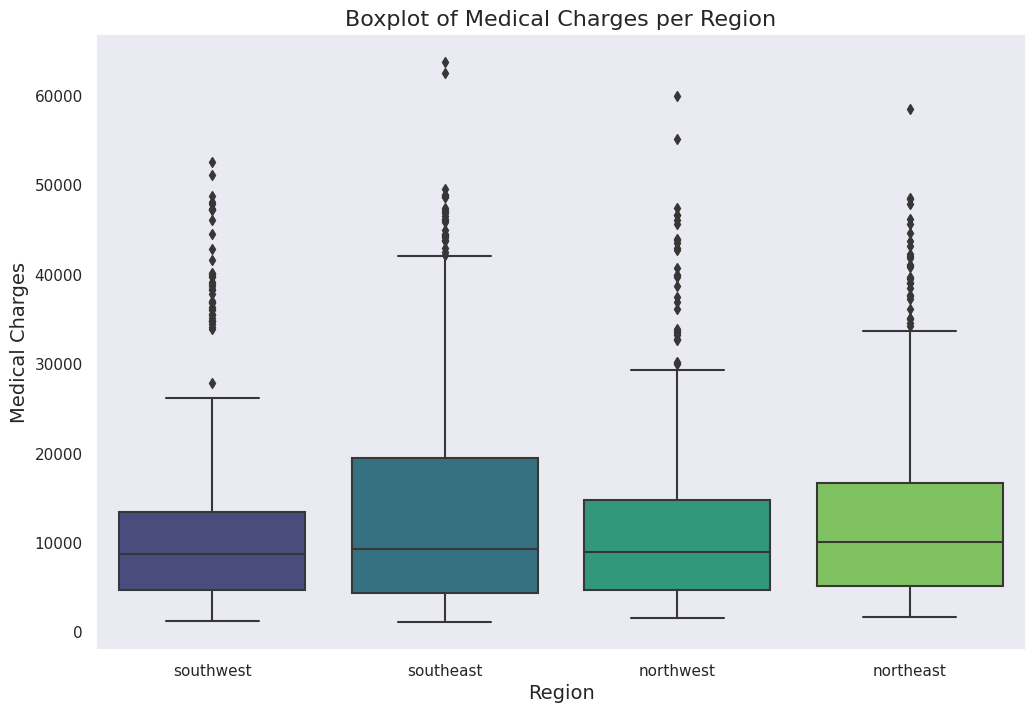

In [ ]:
sns.set(style="dark")

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='region', y='charges', data=data, palette='viridis')

# Set the title and labels
plt.title('Boxplot of Medical Charges per Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Medical Charges', fontsize=14)

# Show the plot
plt.show()

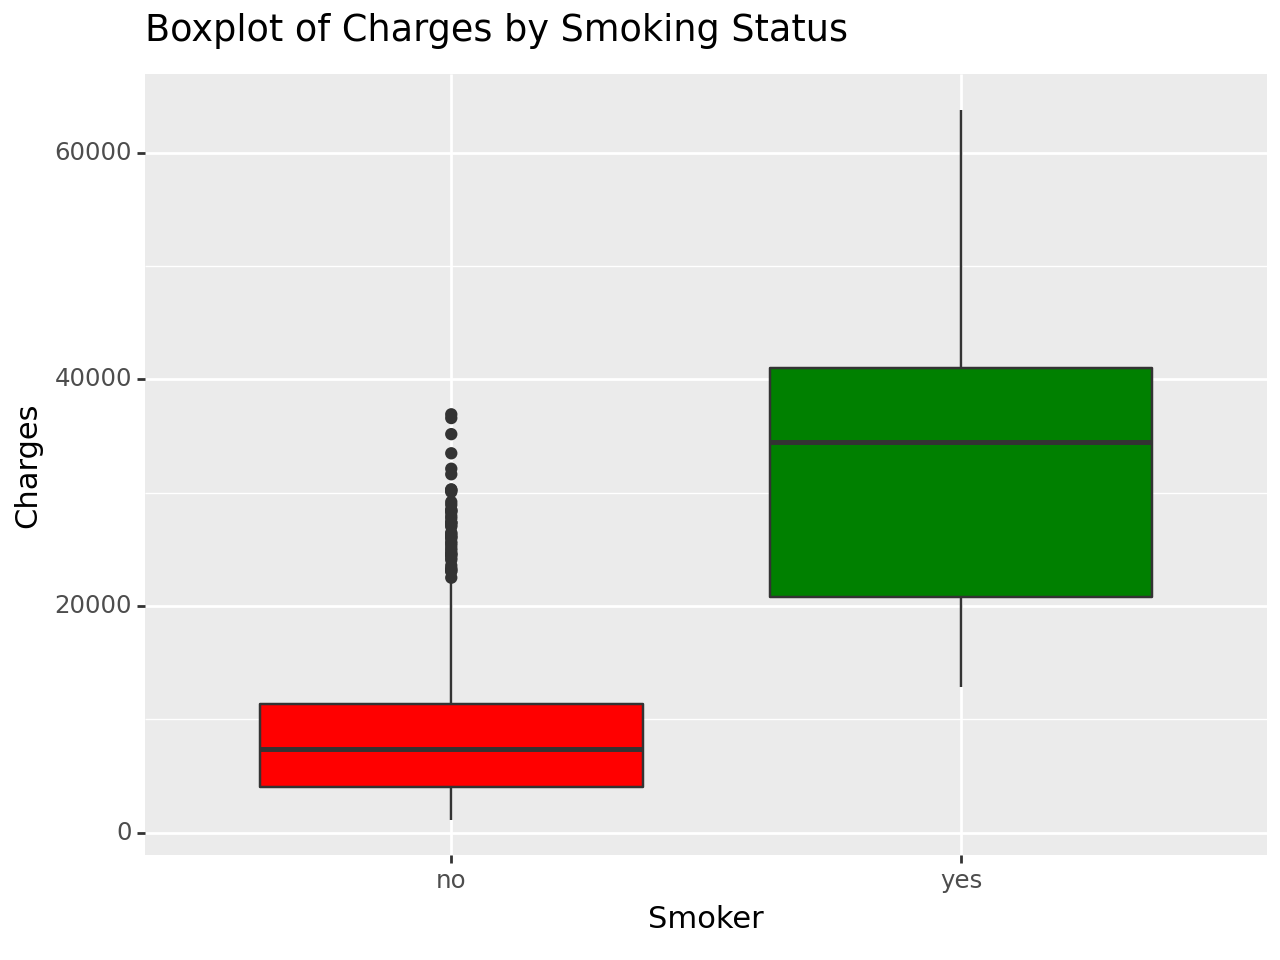

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import ggplot, aes, geom_boxplot, labs

# Assuming 'insurance' is your DataFrame
(ggplot(data, aes(x='smoker', y='charges')) +
 geom_boxplot(fill=['red', 'green']) +
 labs(title="Boxplot of Charges by Smoking Status", x="Smoker", y="Charges"))


### It can be clearly deceived that smokers spends a lot more in terms of medical expenses compared to non-smokers by almost 4x.

C:\Users\Asmaa\AppData\Local\Temp\ipykernel_6356\403127077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



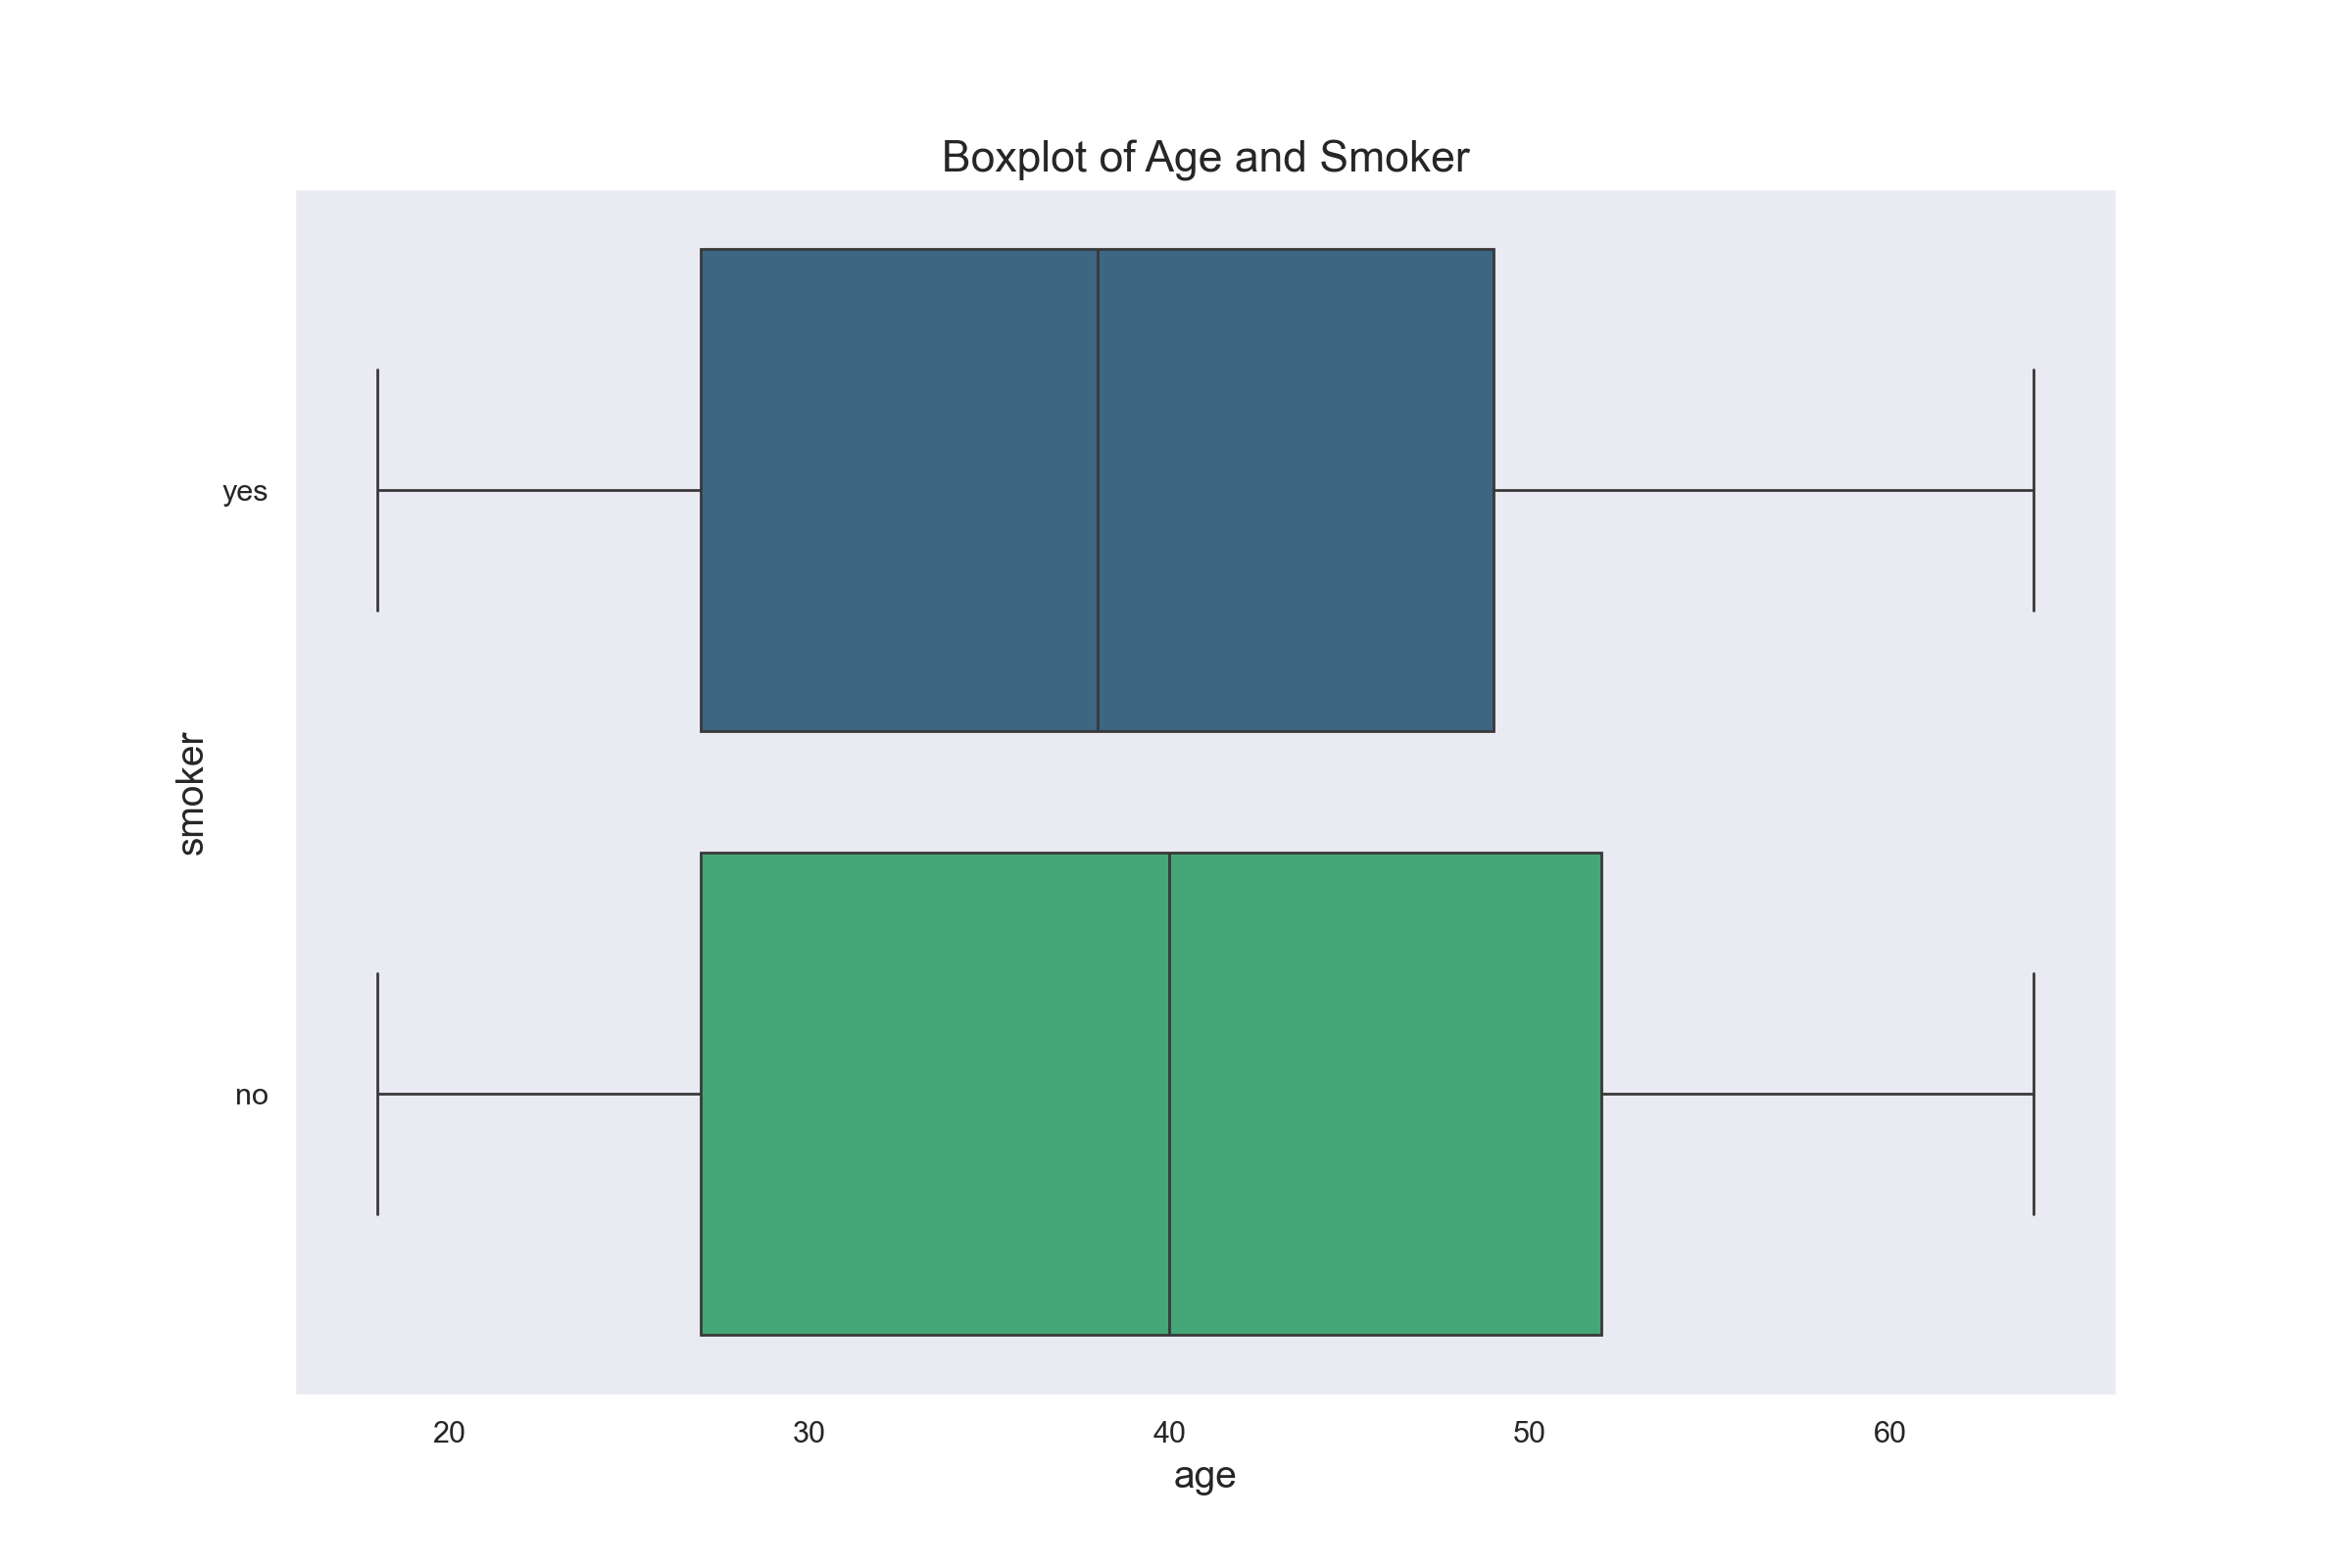

In [ ]:
sns.set(style="dark")

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='age', y='smoker', data=data, palette='viridis')

# Set the title and labels
plt.title('Boxplot of Age and Smoker', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('smoker', fontsize=14)

# Show the plot
plt.show()

### Investigate the interaction between being a smoker and age, as medical costs for smokers might increase with age more significantly

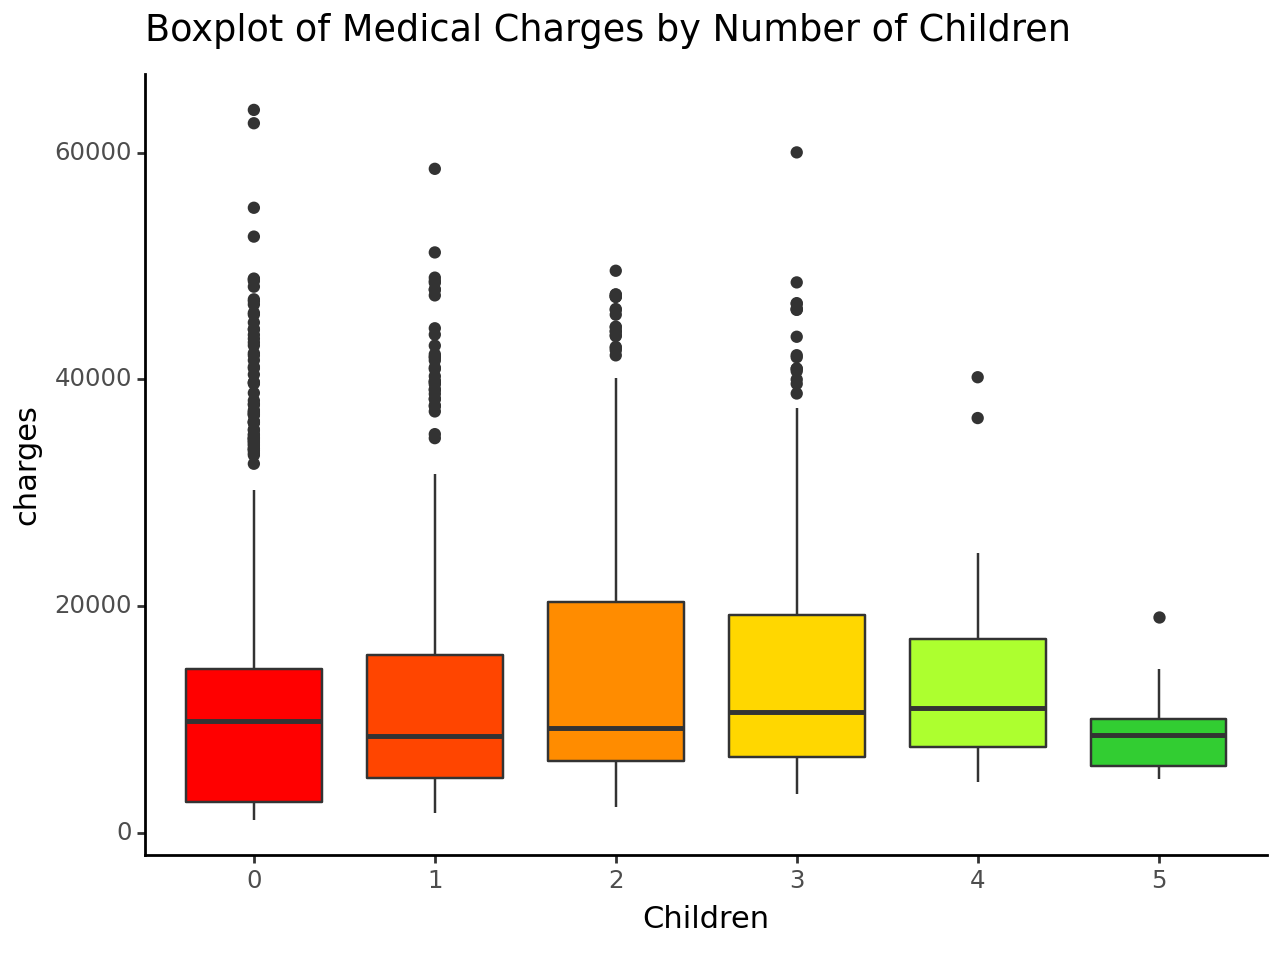

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import ggplot, aes, geom_boxplot, theme_classic, xlab, ggtitle

ggplot(data=data, mapping=aes(x='factor(children)', y='charges')) + \
    geom_boxplot(fill=['#FF0000', '#FF4500', '#FF8C00', '#FFD700', '#ADFF2F', '#32CD32']) + \
    theme_classic() + \
    xlab("Children") + \
    ggtitle("Boxplot of Medical Charges by Number of Children")


C:\Users\Asmaa\AppData\Local\Temp\ipykernel_6356\1062141521.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



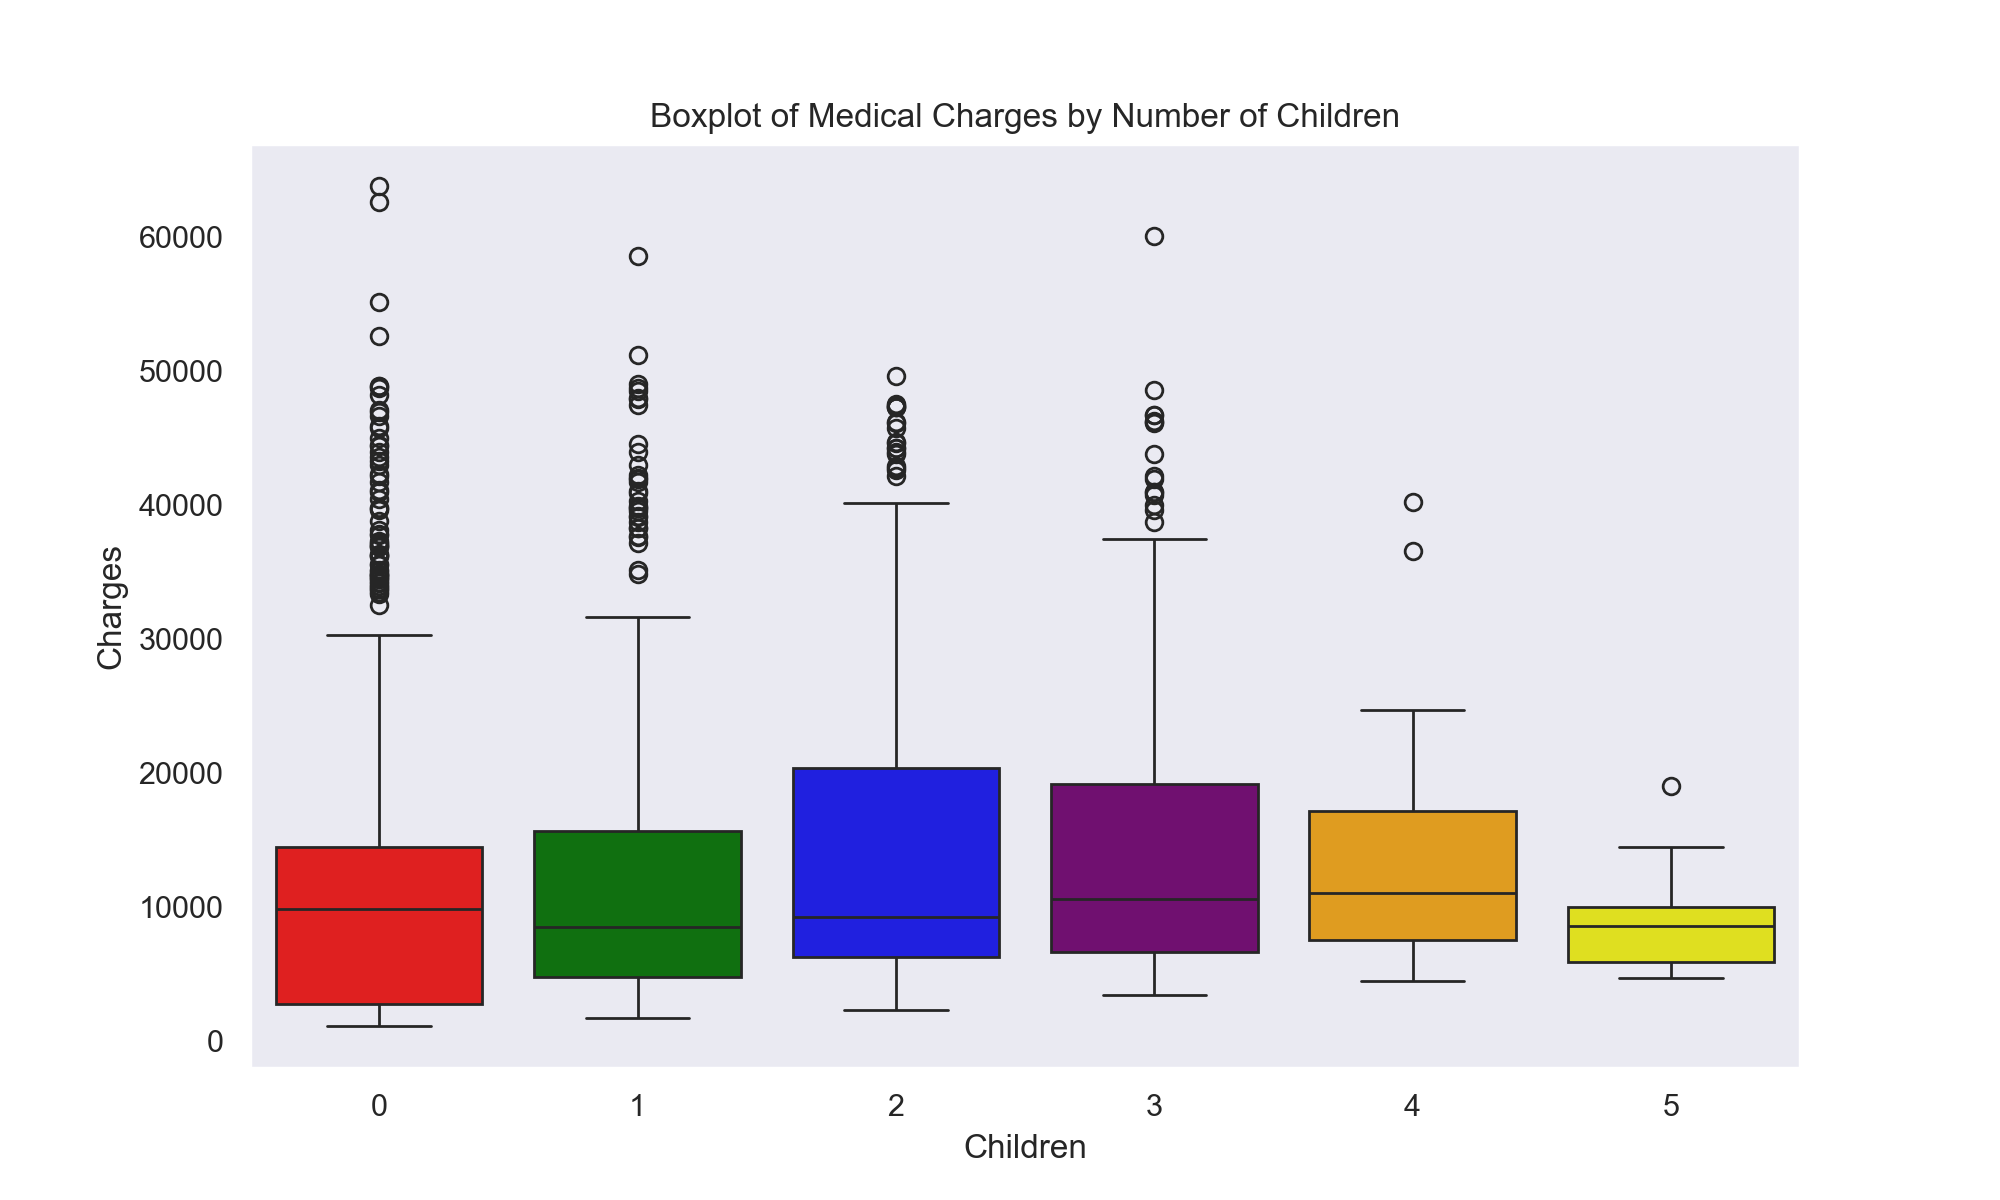

In [ ]:
colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow']

plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=data, palette=colors)
plt.title('Boxplot of Medical Charges by Number of Children')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


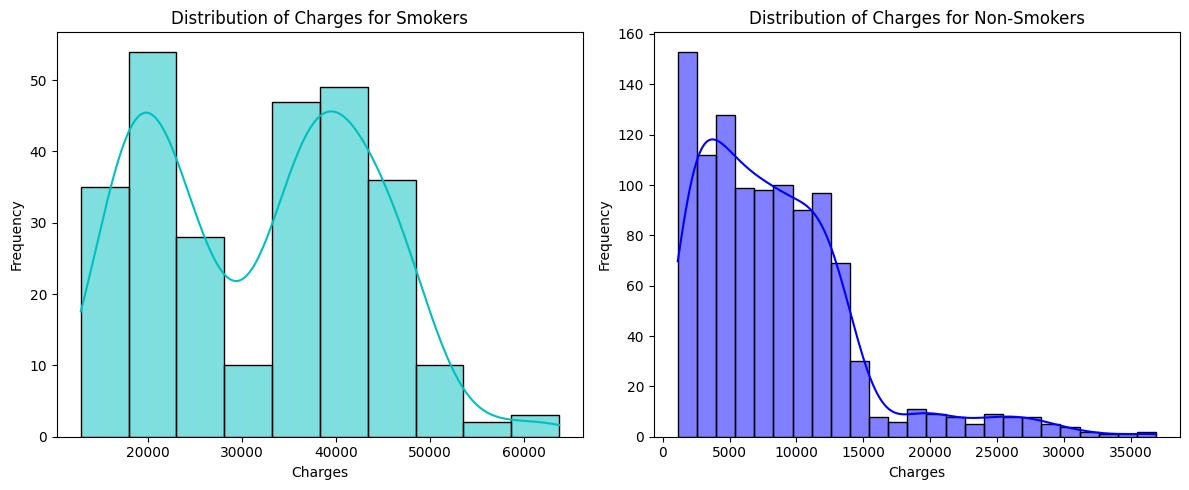

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'data' is your DataFrame

# Set up the matplotlib figure
plt.figure(figsize=(12, 5))

# Plot for smokers
plt.subplot(1, 2, 1)
sns.histplot(data[data['smoker'] =='yes']['charges'], color='c', kde=True)
plt.title('Distribution of Charges for Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Plot for non-smokers
plt.subplot(1, 2, 2)
sns.histplot(data[data['smoker'] == 'no']['charges'], color='b', kde=True)
plt.title('Distribution of Charges for Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


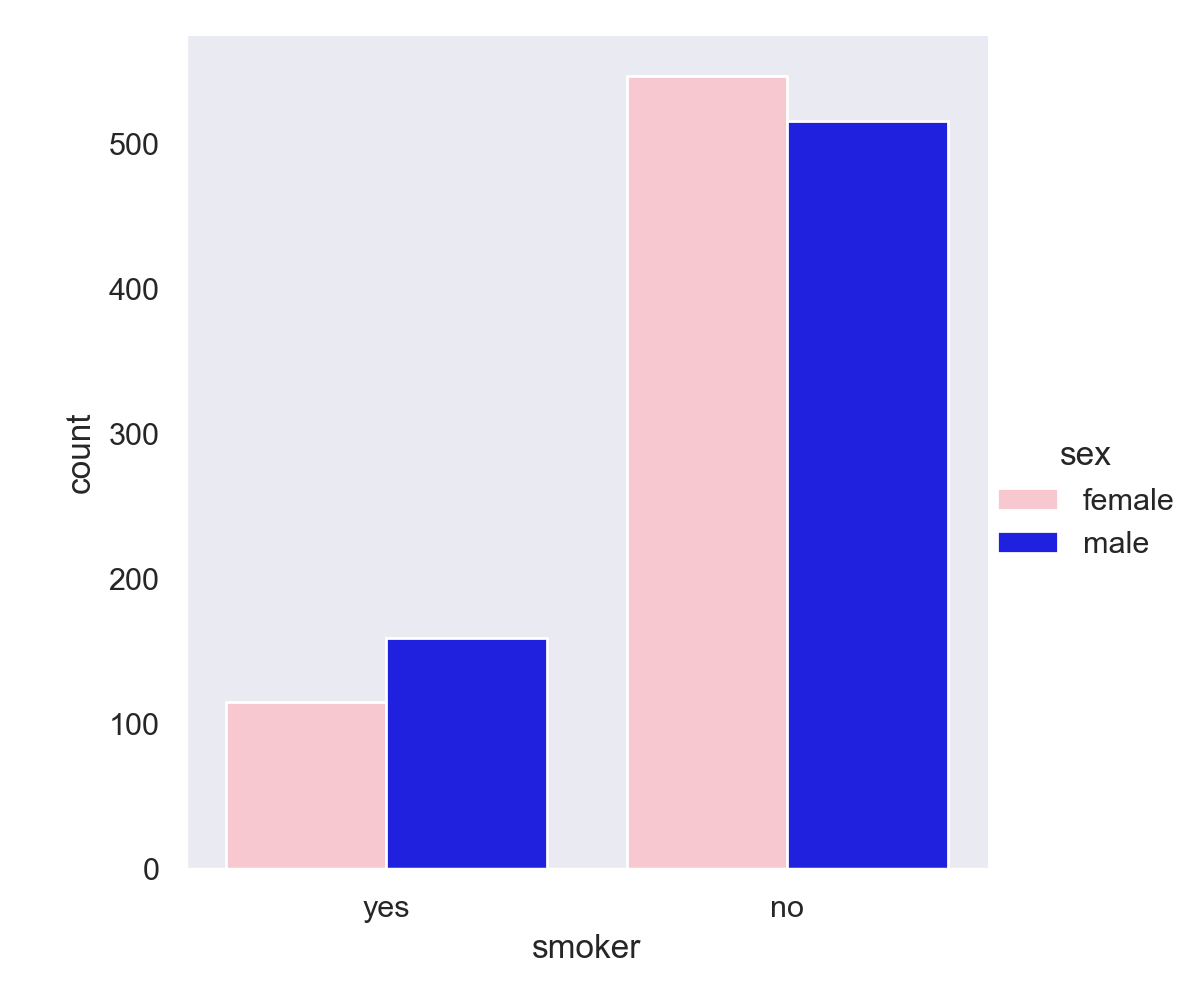

In [ ]:
custom_palette = ['pink', 'blue']
sns.catplot(x="smoker", kind="count",hue = 'sex', palette=custom_palette, data=data)

C:\Users\Asmaa\AppData\Local\Temp\ipykernel_6356\680649968.py:5: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.


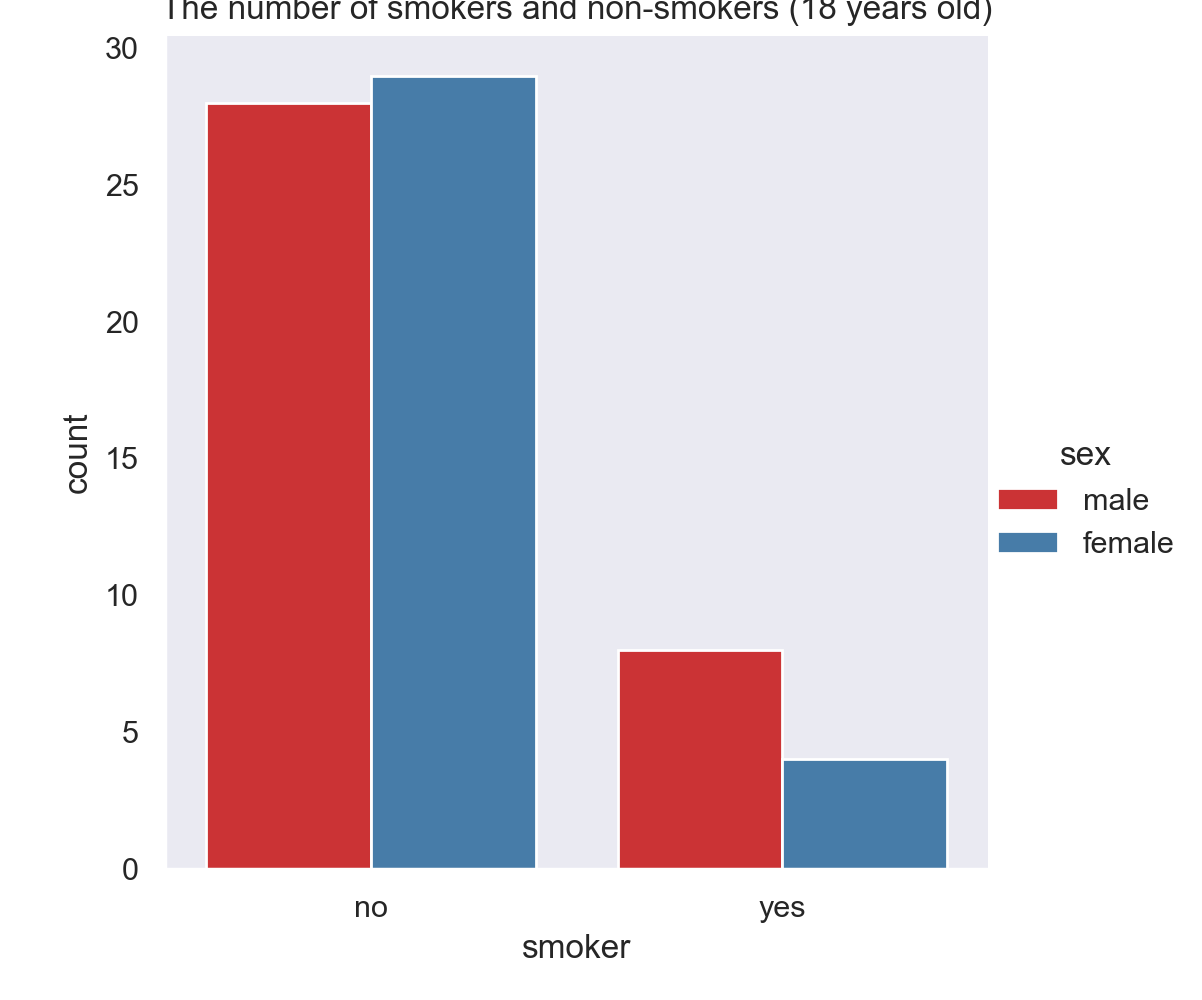

In [ ]:
# Create a custom color palette
custom_palette = sns.color_palette("Set1")

# Create the catplot with the custom color palette
sns.catplot(x="smoker", kind="count", hue='sex', palette=custom_palette, data=data[data['age'] == 18])

# Set the plot title
plt.title("The number of smokers and non-smokers (18 years old)")

# Show the plot
plt.show()

* non-smoking people more. Also we can notice that more male smokers than women smokers. It can be assumed that the total cost of treatment in men will be more than in women, given the impact of smoking

C:\Users\Asmaa\AppData\Local\Temp\ipykernel_6356\840127194.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

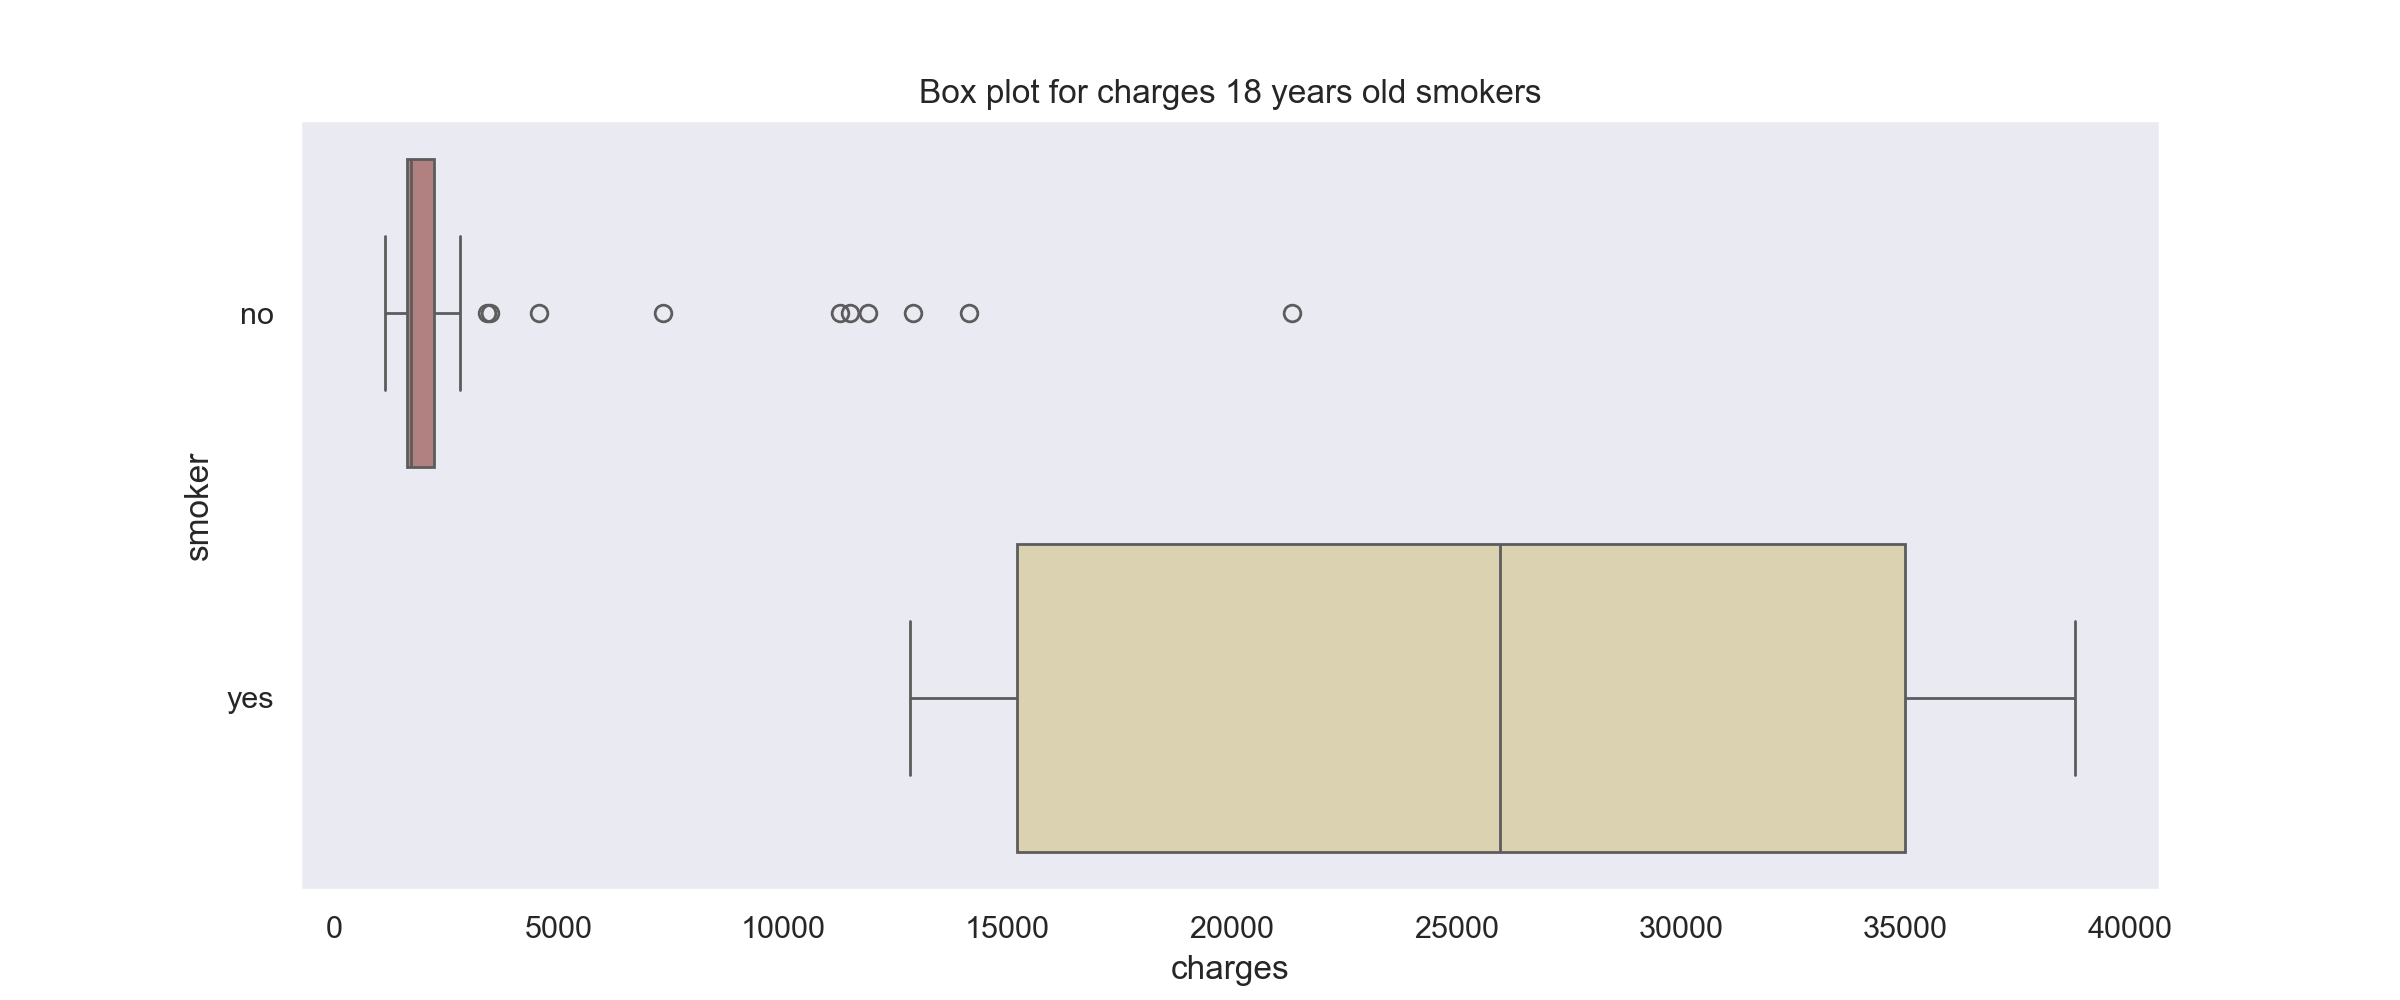

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", palette = 'pink')

* As we can see, even at the age of 18 smokers spend much more on treatment than non-smokers

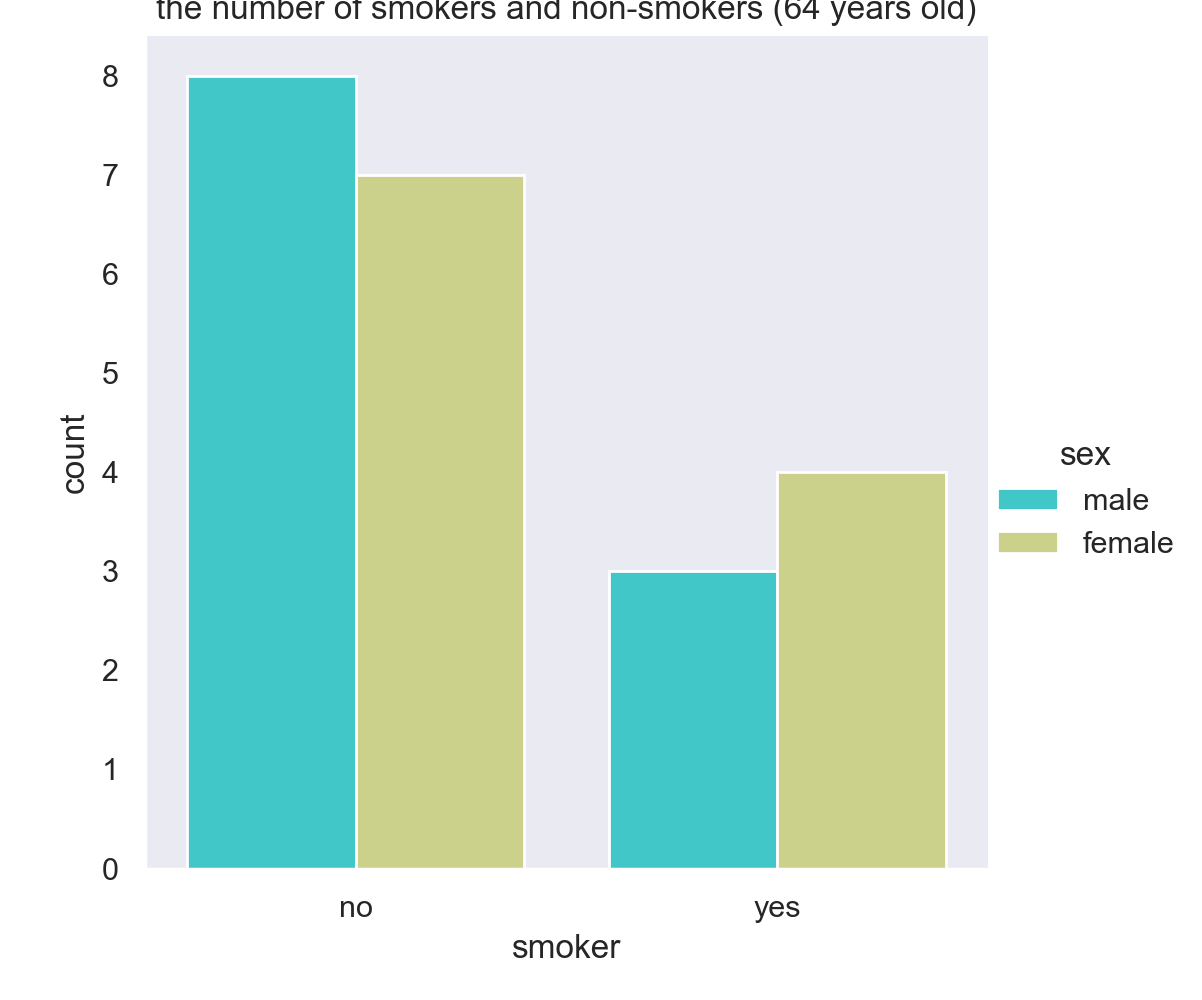

In [ ]:
sns.catplot(x="smoker", kind="count", hue='sex', palette="rainbow", data=data[data['age'] == 64])

print("\n")
plt.title("\nthe number of smokers and non-smokers (64 years old)")

# Show the plot
plt.show()

C:\Users\Asmaa\AppData\Local\Temp\ipykernel_6356\1603898411.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



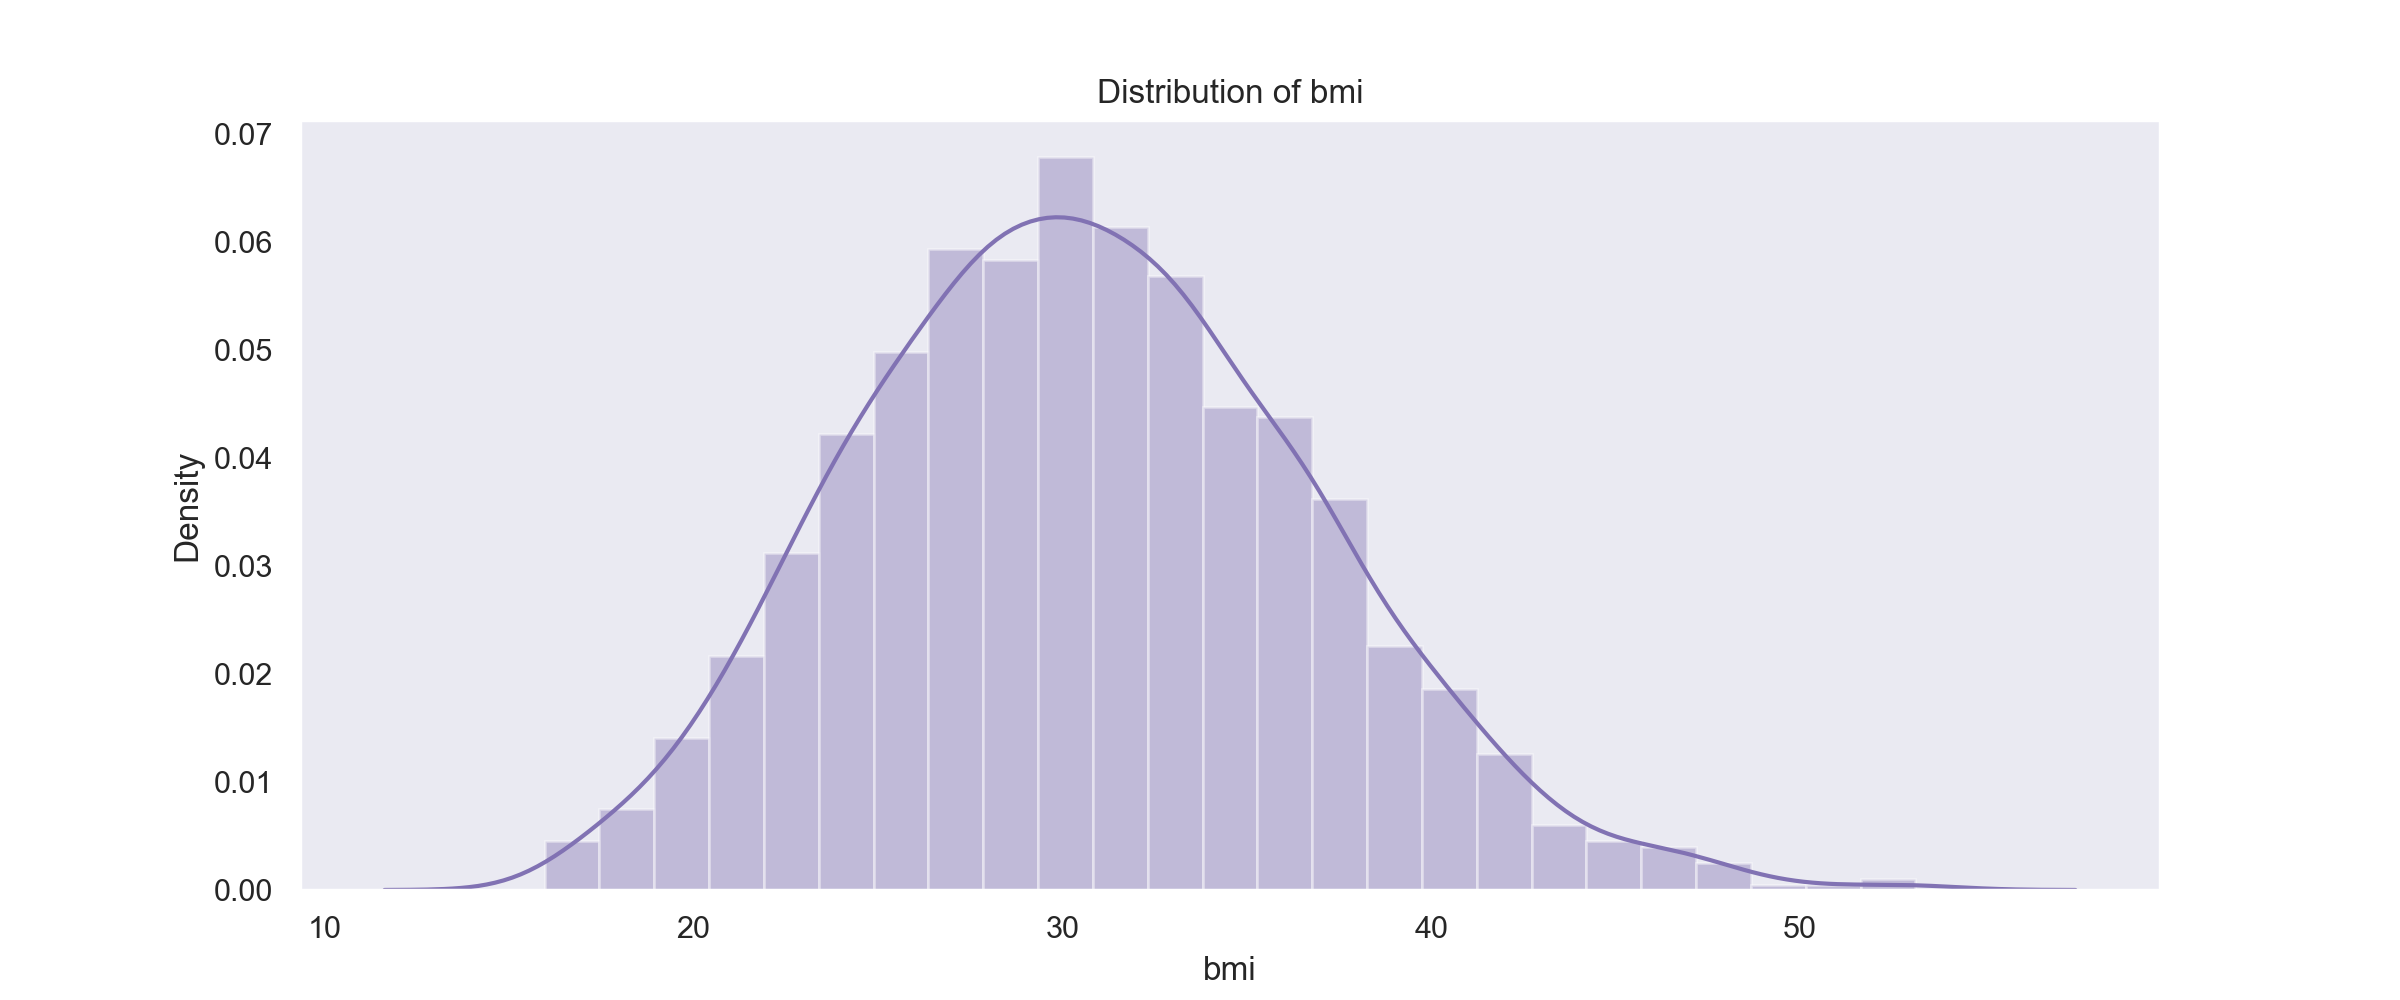

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

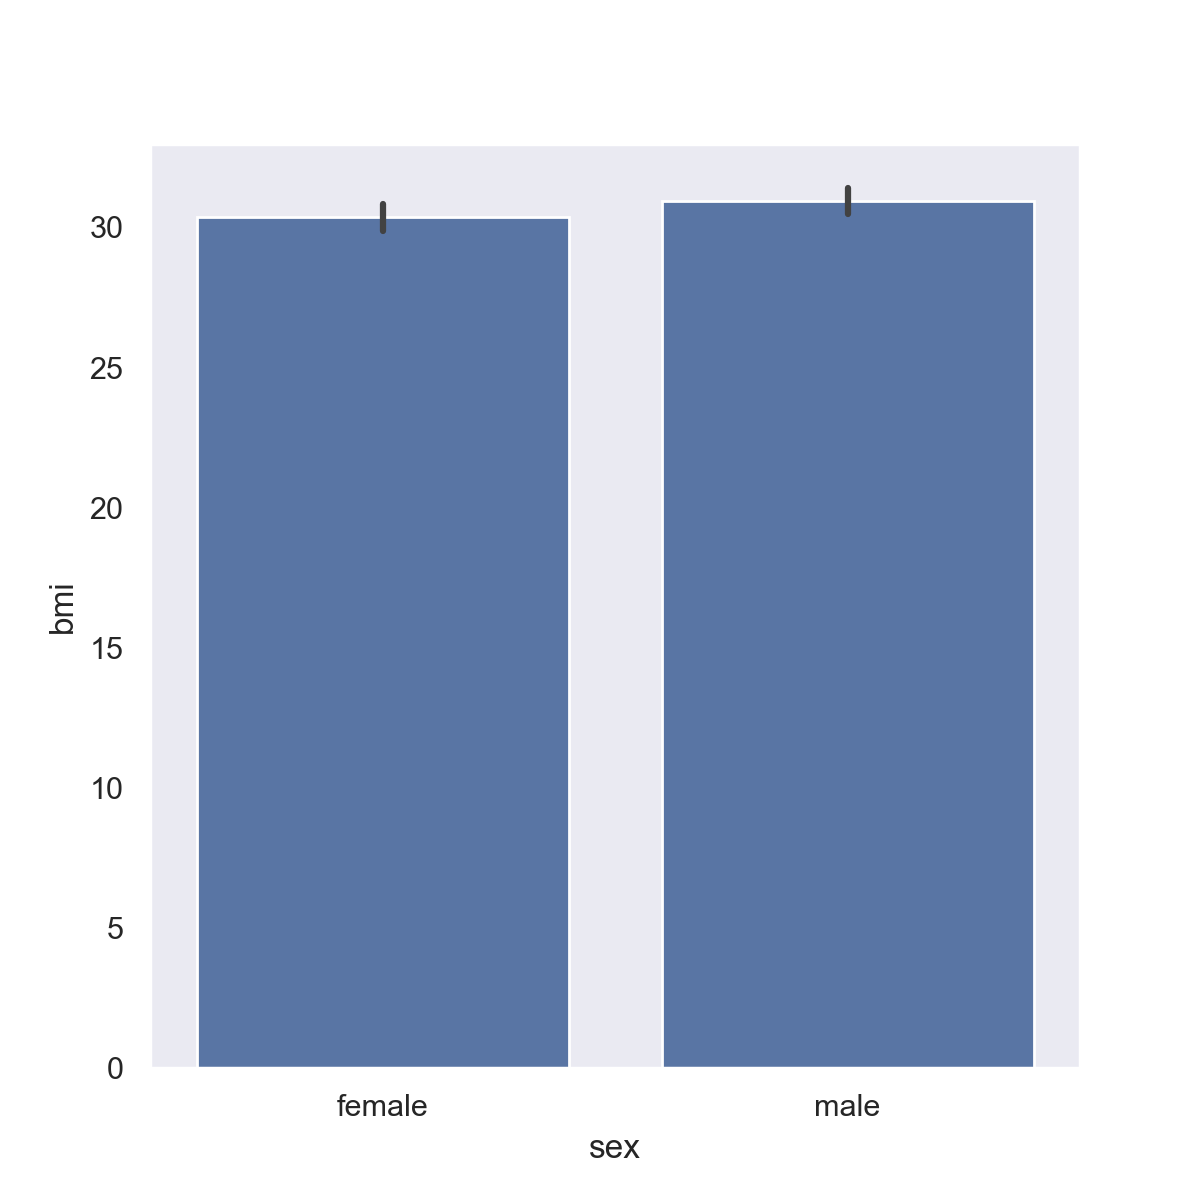

In [ ]:
plt.figure(figsize=(6,6))
sns.barplot(x="sex",y="bmi",data=data);

C:\Users\Asmaa\AppData\Local\Temp\ipykernel_6356\290956800.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



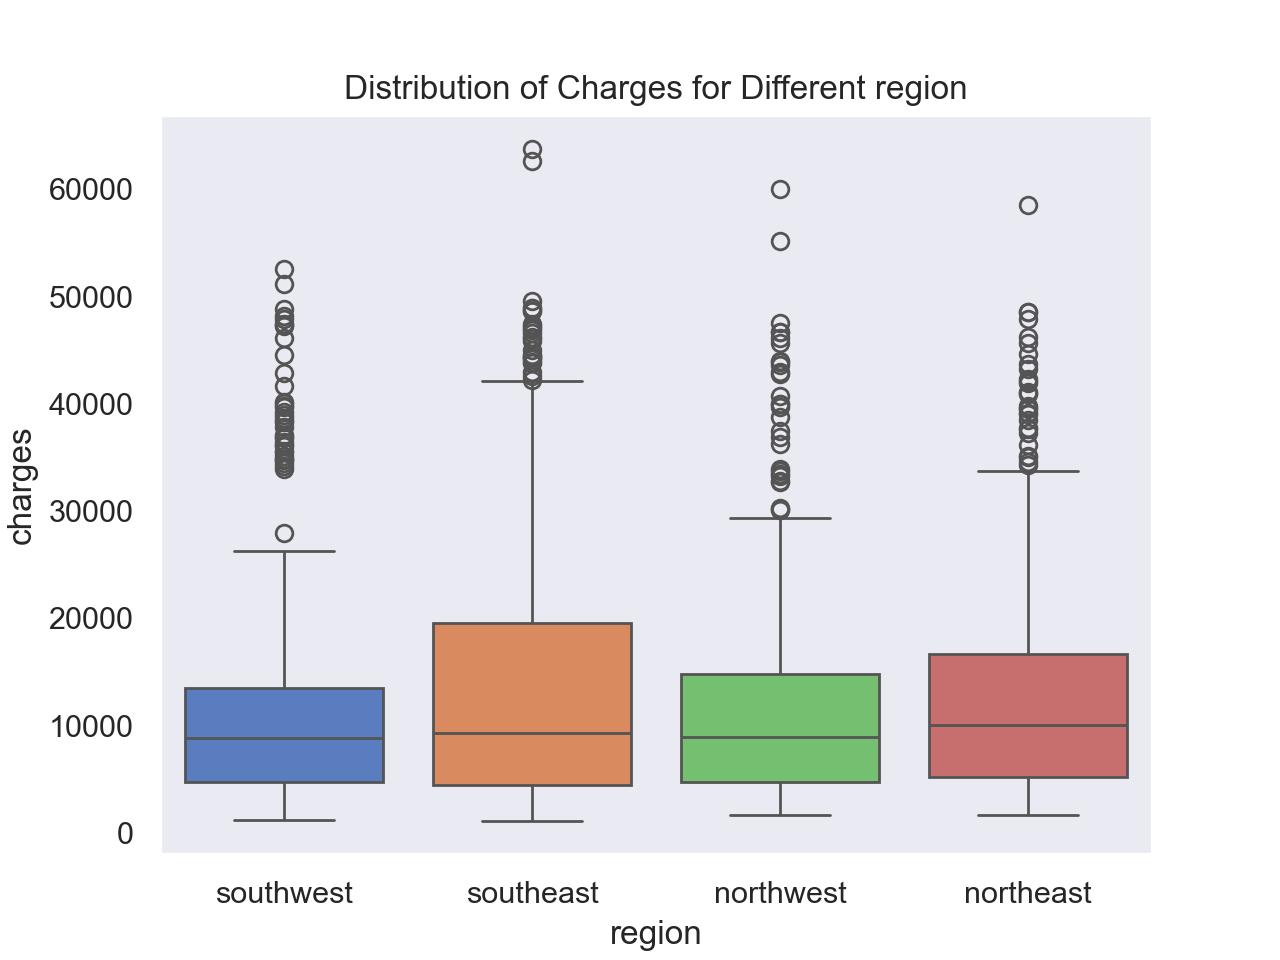

In [ ]:
ax = sns.boxplot(x='region', y='charges', data=data, palette='muted')
plt.title('Distribution of Charges for Different region')
plt.show()

### Feature engineering involves creating new features or modifying existing ones to improve the performance of machine learning models

* we will Create categorical variables representing BMI categories, such as underweight, normal weight, overweight, and obese.

In [ ]:
data['BMI_Category'] = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])

* Family Size :Combine the number of children and the primary beneficiary into a single feature representing the total family size.

In [ ]:
data['Family_Size'] = data['children'] + 1  # Adding 1 for the primary beneficiary

In [ ]:
def childChecker(children):
    if children == 0:
        return False
    else:
        return True

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges,BMI_Category,Family_Size
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,1
1,18,male,33.770,1,no,southeast,1725.55230,Obese,2
2,28,male,33.000,3,no,southeast,4449.46200,Obese,4
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,1
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,4
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,1
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,1
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,1


C:\Users\Asmaa\AppData\Local\Temp\ipykernel_6356\1506411942.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



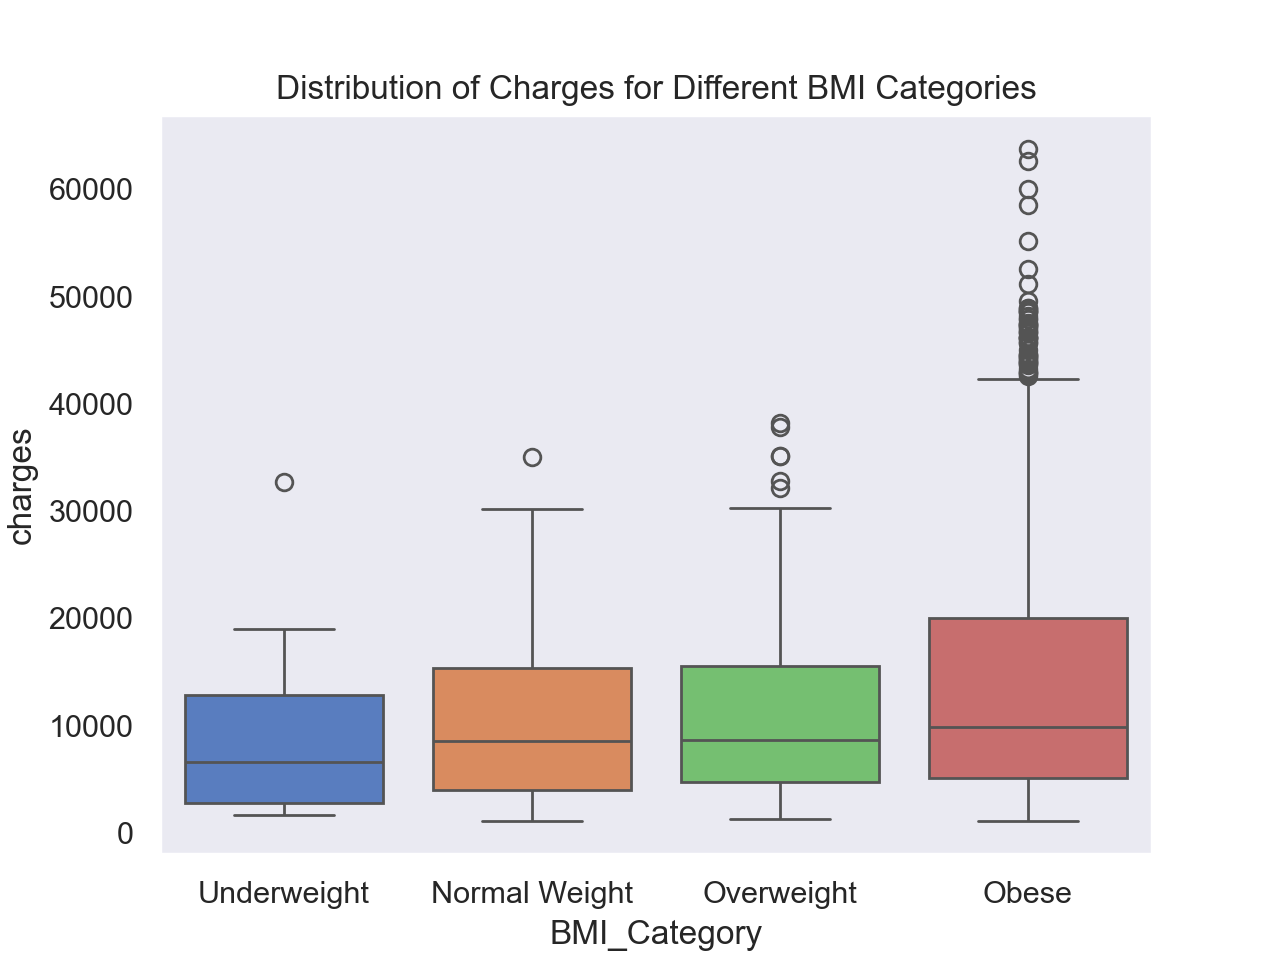

In [ ]:
ax = sns.boxplot(x='BMI_Category', y='charges', data=data, palette='muted')
plt.title('Distribution of Charges for Different BMI Categories')
plt.show()

* Patients with BMI Obese spend more on treatment!

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges,BMI_Category,Family_Size
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,1
1,18,male,33.770,1,no,southeast,1725.55230,Obese,2
2,28,male,33.000,3,no,southeast,4449.46200,Obese,4
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,1
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,4
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,1
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,1
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,1


* [0, 18.5, 24.9, 29.9] labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])

In [ ]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}:", unique_values)

Unique values in age: [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
Unique values in sex: ['female' 'male']
Unique values in bmi: [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.7

In [ ]:
# Define age bins and labels
age_bins = [0, 3, 17, 30, 50, float('inf')]
age_labels = ['Baby', 'Teen', 'Young', 'Adult', 'Old']

# Use pd.cut to create Age_Category
data['age_range'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Display the updated DataFrame
data.head()

,age,sex,bmi,children,smoker,region,charges,BMI_Category,Family_Size,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,1,Young
1,18,male,33.770,1,no,southeast,1725.55230,Obese,2,Young
2,28,male,33.000,3,no,southeast,4449.46200,Obese,4,Young
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,1,Adult
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,1,Adult


In [ ]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex)
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker)
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region)
data.region = le.transform(data.region)
#bmi_category
le.fit(data.BMI_Category.drop_duplicates())
data.BMI_Category=le.transform(data.BMI_Category)
#age_range
le.fit(data.age_range.drop_duplicates())
data.age_range=le.transform(data.age_range)

In [ ]:
data.corr()['charges'].sort_values()

age_range      -0.118797
BMI_Category   -0.037290
region         -0.006547
sex             0.058044
Family_Size     0.067389
children        0.067389
bmi             0.198401
age             0.298308
smoker          0.787234
charges         1.000000
Name: charges, dtype: float64

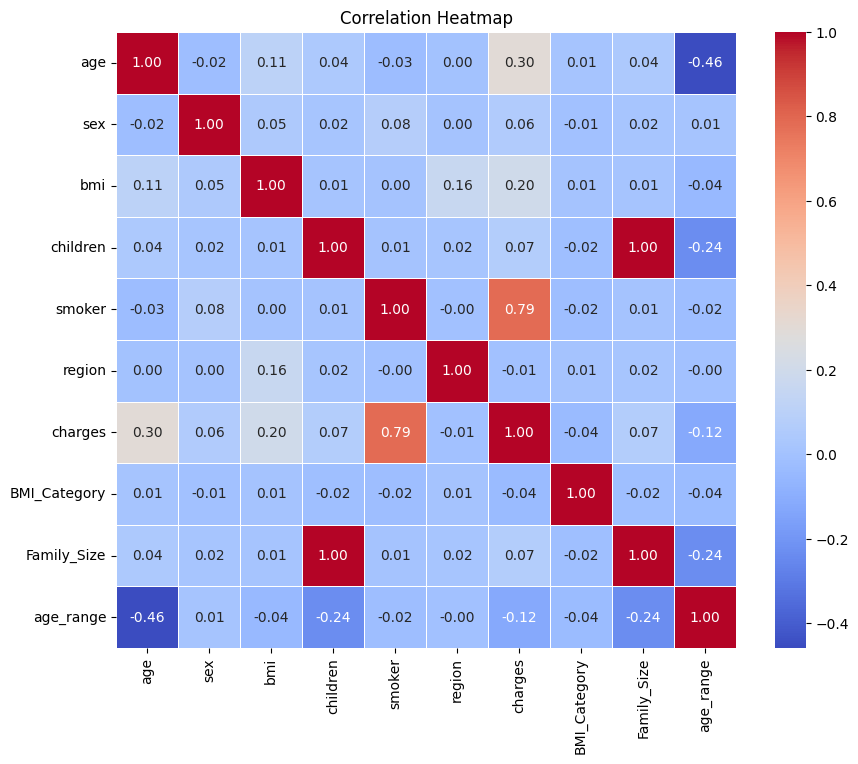

In [ ]:
corr = data.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges,BMI_Category,Family_Size,age_range
0,19,0,27.900,0,1,3,16884.92400,2,1,2
1,18,1,33.770,1,0,2,1725.55230,1,2,2
2,28,1,33.000,3,0,2,4449.46200,1,4,2
3,33,1,22.705,0,0,1,21984.47061,0,1,0
4,32,1,28.880,0,0,1,3866.85520,2,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,1,4,1
1334,18,0,31.920,0,0,0,2205.98080,1,1,2
1335,18,0,36.850,0,0,2,1629.83350,1,1,2
1336,21,0,25.800,0,0,3,2007.94500,2,1,2


### A strong correlation is observed only with the fact of smoking the patient.

* note that women are coded with the symbol " 1 "and men - "0".

In [ ]:
data.isnull().sum()

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
BMI_Category    0
Family_Size     0
age_range       0
dtype: int64

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges,BMI_Category,Family_Size,age_range
0,19,0,27.900,0,1,3,16884.92400,2,1,2
1,18,1,33.770,1,0,2,1725.55230,1,2,2
2,28,1,33.000,3,0,2,4449.46200,1,4,2
3,33,1,22.705,0,0,1,21984.47061,0,1,0
4,32,1,28.880,0,0,1,3866.85520,2,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,1,4,1
1334,18,0,31.920,0,0,0,2205.98080,1,1,2
1335,18,0,36.850,0,0,2,1629.83350,1,1,2
1336,21,0,25.800,0,0,3,2007.94500,2,1,2


In [ ]:
data.dtypes


age               int64
sex               int64
bmi             float64
children          int64
smoker            int64
region            int64
charges         float64
BMI_Category      int64
Family_Size       int64
age_range         int64
dtype: object

### model linear regression

In [ ]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor


In [ ]:
X = data.drop(["charges"],axis=1)
y = data["charges"]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#normalization for the target column
data["charges"]=(data["charges"]-data["charges"].min())/(data["charges"].max()-data["charges"].min())



In [ ]:
X_train

array([[-1.1576804 ,  0.97140947, -0.99692768, ..., -1.63268963,
        -0.90790804,  1.29644668],
       [-1.30061876,  0.97140947, -0.79276204, ...,  1.20757923,
         0.7669042 ,  1.29644668],
       [ 0.91492586, -1.029432  ,  1.15466402, ..., -0.2125552 ,
         0.7669042 ,  0.10683166],
       ...,
       [-1.37208794,  0.97140947, -1.4118716 , ..., -1.63268963,
        -0.07050192,  1.29644668],
       [-0.08564268, -1.029432  , -0.41997378, ...,  1.20757923,
         1.60431032, -1.08278336],
       [-0.30005022, -1.029432  ,  0.87941237, ..., -0.2125552 ,
         0.7669042 , -1.08278336]])

In [ ]:
 y_train

1114     2396.09590
968      3279.86855
599     33471.97189
170     13405.39030
275      9715.84100
           ...     
1096    44641.19740
1131     3693.42800
1295     1964.78000
861      7151.09200
1127     5836.52040
Name: charges, Length: 1069, dtype: float64

what we did before the pipeline

In [ ]:
# Create and train the linear regression model
# Model Training and Testing
lr = LinearRegression()
regressor = lr
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = regressor.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 36506049.593198776


In [ ]:
accuracy = regressor.score(X_test, y_test)
print('Accuracy = '+ str(accuracy))

Accuracy = 0.8013341775483734


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared score
acc_linreg = r2_score(y_test, y_pred) * 100

print('R-squared score of Linear Regression model:', acc_linreg)


R-squared score of Linear Regression model: 80.13341775483734


In [ ]:
# See the size of training and testing
print('Training features : ', X_train.shape)
print('Training target : ',y_train.shape)
print('Testing features : ',X_test.shape)
print('Testing target : ', y_test.shape)


Training features :  (1069, 9)
Training target :  (1069,)
Testing features :  (268, 9)
Testing target :  (268,)


## Random Forest

In [ ]:
# Random Forest Regressor
rfr = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 1, 10],
    'max_depth': [4, 5, 6, 7, 8],
    "max_features": ["auto", "sqrt", "log2", None],
    "min_samples_split": [2, 5, 6, 9, 4],
    "min_samples_leaf": [1, 2, 3],
    'random_state': [0, 1, 42]
}


In [ ]:
# RandomizedSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
cv_random = RandomizedSearchCV(rfr, param_grid, cv=5)
cv_random.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 5, 6, 9, 4],
                                        'n_estimators': [100, 200, 1, 10],
                                        'random_state': [0, 1, 42]})

In [ ]:
best_params = cv_random.best_params_
best_params

{'random_state': 42,
 'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 4}

### Random Forest  Best Hyperparameter Optimization

In [ ]:
# Initialize Random Forest Regressor with some parameters
RF_model = RandomForestRegressor(
    random_state=0,
    n_estimators=200,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features=None,
    max_depth=4
)

# Fit the KNN Regressor model on the training data
RF_model.fit(X_train, y_train)

# Make predictions on the test set
RF_predict = RF_model.predict(X_test)

In [ ]:
# Calculate R-squared score
acc_rf = r2_score(y_test, RF_predict)*100
print('R2-Random Forest :', acc_rf)


R2-Random Forest : 90.30147374252886


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, RF_predict)
mse = mean_squared_error(y_test, RF_predict)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 2463.925036350686
Mean Squared Error (MSE): 17821630.12072152


### Evaluation and comparision of all the models

### SVM

In [ ]:

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid for SVR

param_grid_svr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'epsilon': [0.1, 0.2, 0.5, 1.0]
}


In [ ]:
# Create a Support Vector Regressor
svr = SVR()

In [ ]:
# randomizedSearchCV for SVR
cv_random_svr = RandomizedSearchCV(svr, param_grid_svr)
cv_random_svr.fit(X_train, y_train)
best_params_svr = cv_random_svr.best_params_
best_params_svr

{'kernel': 'linear', 'gamma': 1, 'epsilon': 0.2, 'degree': 2, 'C': 100}

In [ ]:

# Initialize SVR with best parameters
svr_model = SVR(kernel='poly', gamma=1, epsilon=1.0, degree=3, C=1)

# Fit the SVR model on the training data
svr_model.fit(X_train, y_train)

# Make predictions on the test set
svr_predict = svr_model.predict(X_test)


In [ ]:
# Calculating the accuracy
acc_svm = r2_score(y_test, svr_predict)*100
print('support vector machine' ,acc_svm )



support vector machine 71.37952288538271


### KNN  Hyperparameter tuning

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid for KNN Regression

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 1,10,20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40,10],
    'p': [1, 2], # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


# Create a KNN Regressor
knn = KNeighborsRegressor()

In [ ]:
# RandomizedSearchCV for KNN Regressor
cv_random_knn = RandomizedSearchCV(knn, param_distributions=param_grid_knn, cv=5)
cv_random_knn.fit(X_train, y_train)
best_params_knn = cv_random_knn.best_params_
best_params_knn

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 5,
 'metric': 'manhattan',
 'leaf_size': 30,
 'algorithm': 'brute'}

 ### KNN  Best Hyperparameter Optimization

In [ ]:
# Initialize KNN Regressor with some parameters
knn_model = KNeighborsRegressor(weights='distance', p=2, n_neighbors=5, leaf_size=30, algorithm='kd_tree')

# Fit the KNN Regressor model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_predict = knn_model.predict(X_test)


In [ ]:
# Evaluate the performance of the KNN Regressor
mse_knn = mean_squared_error(y_test, knn_predict)
r2_knn = r2_score(y_test, knn_predict)

# Print the evaluation metrics for KNN Regressor
print("Mean Squared Error (MSE) for KNN Regressor:", mse_knn)
print("R-squared (R2) for KNN Regressor:", r2_knn)


Mean Squared Error (MSE) for KNN Regressor: 24691428.61691662
R-squared (R2) for KNN Regressor: 0.8656293127208359


In [ ]:
# Calculating the accuracy
acc_knn = r2_score(y_test, knn_predict)*100
print('K - Nearest Neighbors' ,acc_knn )


K - Nearest Neighbors 86.56293127208359


### Create a Decision tree regressor model

In [ ]:

clf = DecisionTreeRegressor()
# Hyperparameter Optimization
parameters = {'criterion': ['absolute_error', 'squared_error','friedman_mse'],  # 'mse' stands for mean squared error
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'] }

# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_


In [ ]:
print(clf)

DecisionTreeRegressor(criterion='absolute_error', max_depth=20,
                      min_samples_leaf=4, min_samples_split=10,
                      splitter='random')


In [ ]:

# Train the model using the training sets
clf.fit(X_train, y_train)
# Prediction on test set
y_pred = clf.predict(X_test)


In [ ]:
acc_dt = r2_score(y_test, y_pred)*100
print('Decision Tree' ,acc_dt )


Decision Tree 88.53709327236858


### ridge regression model

In [ ]:

from sklearn.linear_model import Ridge
model=Ridge()
# Define hyperparameters to tune
param_grid = {'alpha': [0.1, 1, 10, 100]}
# Perform hyperparameter optimization using GridSearchCV
grid_search = GridSearchCV(model, param_grid)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
model = grid_search.best_estimator_


In [ ]:
print(model)

Ridge(alpha=10)


In [ ]:

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 36829861.83189356


In [ ]:
acc_rr = r2_score(y_test, y_pred)*100
print('ridge regression' ,acc_rr )

ridge regression 79.95719922273908


In [66]:
# Define hyperparameter grids for each model
param_grids = {
    'Ridge': {'model__alpha': [0.1, 1, 10, 100]},
    'SVR': { 'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'epsilon': [0.1, 0.2, 0.5, 1.0]},
    'LinearRegression': {'model__fit_intercept': [True, False], 'model__normalize': [True, False]},
    'DecisionTreeRegressor': { 'criterion': ['absolute_error', 'squared_error','friedman_mse'],  # 'mse' stands for mean squared error
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']},
    'RandomForestRegressor': {'n_estimators': [100, 200, 1, 10],
    'max_depth': [4, 5, 6, 7, 8],
    "max_features": ["auto", "sqrt", "log2", None],
    "min_samples_split": [2, 5, 6, 9, 4],
    "min_samples_leaf": [1, 2, 3],
    'random_state': [0, 1, 42]},
    'GradientBoostingRegressor': {'model__n_estimators': [50, 100, 200],
                                  'model__learning_rate': [0.01, 0.1, 0.2],
                                  'model__max_depth': [3, 5, 7],
                                  'model__min_samples_split': [2, 5, 10],
                                  'model__min_samples_leaf': [1, 2, 4],
                                  'model__max_features': [None, 'sqrt', 'log2']},
    'KNeighborsRegressor': {'model__n_neighbors': [3, 5, 7, 10, 20],
                             'model__weights': ['uniform', 'distance'],
                             'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                             'model__leaf_size': [20, 30, 40, 10],
                             'model__p': [1, 2],
                             'model__metric': ['euclidean', 'manhattan', 'minkowski']}
}


In [72]:
models = [
    ('Ridge', Ridge()),
    ('SVR', SVR()),
    ('LinearRegression', LinearRegression()),
    ('DecisionTreeRegressor', DecisionTreeRegressor()),
    ('RandomForestRegressor', RandomForestRegressor()),
    ('GradientBoostingRegressor', GradientBoostingRegressor()),
    ('KNeighborsRegressor', KNeighborsRegressor())
]

In [73]:
for model_name, model in models:
    print(f"Hyperparameter tuning for {model_name}...")

    # Create a pipeline with a scaler and the current model
    pipeline = Pipeline([
       # ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Get the hyperparameter grid for the current model
    param_grid = param_grids[model_name]

Hyperparameter tuning for Ridge...
Hyperparameter tuning for SVR...
Hyperparameter tuning for LinearRegression...
Hyperparameter tuning for DecisionTreeRegressor...
Hyperparameter tuning for RandomForestRegressor...
Hyperparameter tuning for GradientBoostingRegressor...
Hyperparameter tuning for KNeighborsRegressor...


In [83]:
 # Create a RandomizedSearchCV object for the current model
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, cv=5)

    # Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('model', KNeighborsRegressor())]),
                   param_distributions={'model__algorithm': ['auto',
                                                             'ball_tree',
                                                             'kd_tree',
                                                             'brute'],
                                        'model__leaf_size': [20, 30, 40, 10],
                                        'model__metric': ['euclidean',
                                                          'manhattan',
                                                          'minkowski'],
                                        'model__n_neighbors': [3, 5, 7, 10, 20],
                                        'model__p': [1, 2],
                                        'model__weights': ['uniform',
                                                           'distance']})

In [78]:
# Get the best model for the current iteration
best_model = random_search.best_estimator_

    # Train the best model on the entire training set
best_model.fit(X_train, y_train)

    # Make predictions on the test set
y_pred = best_model.predict(X_test)

In [80]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best {model_name} Mean Squared Error: {mse}')
print(f'Best {model_name} R^2 Score: {r2}')

Best KNeighborsRegressor Mean Squared Error: 26156503.723631296
Best KNeighborsRegressor R^2 Score: 0.8576563779806414


### /////////////////

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest', 'Support Vector Machines',
              'K - Nearest Neighbors','Decision Tree','ridge regression'],
    'Score': [acc_linreg, acc_rf, acc_svm, acc_knn,acc_dt,acc_rr]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,90.301474
4,Decision Tree,88.537093
3,K - Nearest Neighbors,86.562931
0,Linear Regression,80.133418
5,ridge regression,79.957199
2,Support Vector Machines,71.379523


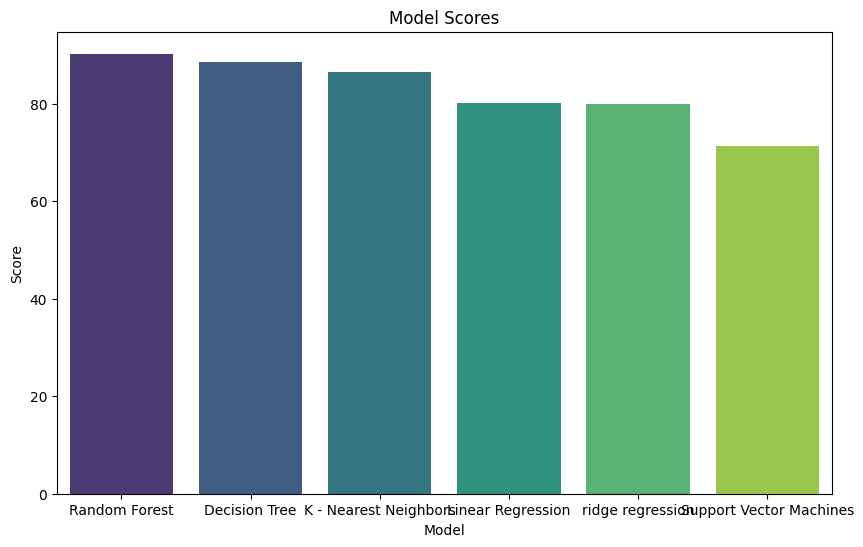

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with the model scores
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest', 'Support Vector Machines',
              'K - Nearest Neighbors','Decision Tree','ridge regression'],
    'Score': [acc_linreg, acc_rf, acc_svm, acc_knn,acc_dt,acc_rr]
})

# Sort the DataFrame by the 'Score' column
models_sorted = models.sort_values(by='Score', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', data=models_sorted, palette='viridis')
plt.title('Model Scores')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()
